# Exercice 5: Manipulation de couches vecteur avec QGIS | Chargement et affichage avec geopandas
O. Kaufmann 2023, 2026.

In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

***
## 1. Préparation	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA0wDTANOnA7bxAAAACXBIWXMAAC4jAAAuIwF4pT92AAAAB3RJTUUH6AwJEjgOYb53JgAAABl0RVh0Q29tbWVudABDcmVhdGVkIHdpdGggR0lNUFeBDhcAAAroSURBVHja3Zt5WFZVGsB/534fKAEuD2ih6ZQo6pgsoZW5tNhDPfm4sGiTkwqKoiVZmo5LpuZak40ohWva4tSoGJajUi45huVTargUIJOOy6A4prIrcN/5Az5AgW+5fIAz53nOP/fec++5v/O+73nP+56jaOCy6G/Q3K1TMxFpLSLuoECRqymyRZE3cWBmg/ZH1dubE6KJ9/kmQJBHgECgO9AOaG+llQD/As4CJ4CjCnVw4pDMn/8nALy3rVNTXfQBwFDgKcDLSa/OBpJBJaLUjtjBp4rvKADLkzp2BZkIvAA0q2ep/Q3hY6VUfOyQzMxGBbA8qaO/iMwFQhtJUz9TMO/l0My0BgUQl+TnJaIvAcbUqx2xr+hAgkKbNSk043q9AnhyUEsGRnpFKFh5u34LjV4uAmNfDcvcXi8Aln3e0U2EFeWjXqsJvwNKHEqmTQ79502nAVi6tdM9CkkCHna0N+L0h+3q8gGlGDI57NRvdX7b0q2d2yP6fuA+o0PSSJKRoVD9p4RnnDcM4J2tfu0ROWDDeblTAYDwq0Lr91pE+gWHAfx5i18LkEOAnxO7lAP8CKQDp4C88usugC9wP9BT4F4nfjNVKdVnanhGnt0A4v/eTRUU3vyq3Juru+MCHwOJyoWUqYNP6VaN7ZbfU0xJJ0EigNECHZ1g07f7dHYbOLJ7qn0t3triNxeYU0f5zkbxplKsnxaeUWCE3PH/vMaOfV+EAvMFutVxIGZNH5qxyCaAJZs79wD5HjDV4WPxSjHzTxEZuc6Q4bcTu5h0XZ8sMA9wM/iamwrVc/rQ9GO1Ali4pZumSfFRwN/gR66DGj5jaPqO+rBpizf7BQFJIoaN8o+euPWMHVapCtotNPTisSL4i4CBek6Eh+vr5wFmDM04iqheAielXPvsrwpB9cilKKpGCVi8uUsTXeQ04GOgb1lKqUdnDk070yBBlU1d7hEkBehgYIo9p2km35kRPxffIgGlukSK4GNg5AsFBjfUzwPMHJZ2UYRnRMjH8f62Ky0tHXGLCqxM7oVArONiBQJTXh+W/kND+zivP5d+SiBGrExOVmrspr0xlQCyr119WKCbgZ/fN9sjPaGxHD0fV7eNIiTXNNI2JCPwl+z9wRUARBgqonC0gnqZAY237IsO/QlBTSk3cNUqNdTKewwD0DZ++xQCoQZGf9Mbz6WdaOy175w/pJ0U2GqvDbBIhi5lUSzt1PkLvxOhg6PGj7LYwB1RREhwZPDKbUSnOZ92bafpIo8aGP3TmEzf3ikAzK29dgtkGYDQWxNUcMWNihG2qfufzx128k75f2b3T0FE7XTcjvGghuCHKJCqRsIGQWE/d1gROGBAkjuba1p72+Fd/WSkk9cWB6xXbp6dbTx2GqWim086UOigHUg10KV2mgjta7KUt9cq9/X5z886ayh+nXPeXwpyegHW6nBEdlxf0c+hVZ/SXAysD2inCXg5ZjxUplIvGBZVPfcCUnDN1mOPU6rvyFne9y573+vu7nZTcNiX8dbsdnrKqwj5ddVXPTcLPf+qTQiiy66c5f3sgjBj0CFEuOqoFGgGxMYpmSDJu4ieZzNq3Vd0fVdOnH0QBEwNAaC50yx3/iX03Cu2IYienBPXx93aQ28k9kOEZo46dJoIZxxsdP8nP0533vRVkG0PhD4iJOfE1W4TbhRdbVbbmsBK/dUsqCuOJj1Sf/nSD8hwKgQEk+99JZhUbSr2CK7mXXlZMQM8fFZVizWWlupdDHz6qlmEdCDYwYZBzgRQBuEy0qt7iebu3dSqOsBXudkTQjxbJ+Tepv/BBj6bpgmkG7ADRvMFX1iFoF9H120axkeA3XmXJ7S4XTAF8u3qv0WdywEcNhAGGzhtY4DmeJy/eB6wwDqEXPRSmzbhIRG+zr08vqXlwtKRJw8i6mkRlW9zWrfYAFGHNUT7TlDioPG4u7ik9FlHATy2JoefLpbMBuZbd2vzKLp5WU+7WFCSdqnWGnj4bF7yW9uGeFvavTvqRAoQYqckCKiDCuCVDx/4HsdT398sG3XiCSN68HH4XQzwc6uWfdKig4twMzcFyC0qLYn/Lsfc0r01NlyPVJSETB+8Ldty4ZUND/QWSAasTZ0pcZEn+lhCYl8aUIPHJ33YvZ8RACMSC9iXWTgXmGvtuaLiXH7Lv4SIWAt4BoioPYuThtxtub8s0i5J2F4ZFldqo6GIsMiK2A0BZiMQwjcXkPDDzXnAG7V7doqi4nyu5F9CF6rF+qqo5AOC2rcoKbQipxEXeeIgqBARlVdLTGNjBYC4UcfPiKg9BgKj/oj+utGpb9buXD49XjQfmF3LEhcRuFGcz5W8i+giNUV1LLWrwN6F20LbWNovjzx+EHjmdkkAdi6PPH7u9tRYnMG8wBsT13cPMQrhpe35rDhUvACYZS2uf6OkdghVSheEfyxKCmtrubAi6ngKqBCBvCrt4qrlBldEtftS4JgBW6BESHzpg+49DEd29+aw5FDxItzM82qSgFskITcLvUwfaqu+usj+BZ+HVQR64qOOHaQyk3QYzMk1JEd3IMIMg1LgIfD1ix/49zIK4e29OcxefHIJMMNadudGSSFX8rIoFcFKPsAXODA/Kayd5V3vjbZIgpoWH3W0enIU4C/Jr5JxYc9O4BmD/1GIEJ0w5thfjYKIienAW3O6TMspKl24eF9WrQbWxeyGl4cPmrLqj51B8djs0K21RrCqTbATPvC/X4RjgEcdXPuNSqlJCaNTrxhpHBbWljcXdJ0c/132UmvPuZialkHQrO7lOCvQd05YzRBq9DDGr/OPFFhfx/XNVWAhqJWrxqQ6HEW6r6c7T4/3nQK8YzUnoDXBy7MNJguEmiO6Z0H1nROeeNYuAAAxa/03CIxywkLvKvAJqE1KmVJWjTlid0q/VY9WhI73cRxCzb91FtRjc8O3nLELwLh1/k0R9ZVAXyeueq8Bh4C08uV0cZV+/I6yHWG6JqbRq8YeKQTw9fXlyRkerwLvWofgirdn2yoQaizngH5zwxPP2AQAMHZdQHOEfSIENXCe42sUg9ZGpxZZLkSvCbAJwaS50sqzDSbNqnN6HnhiXkRipk0AZR8O9ALZIfBQA0PYbVKug1ZH/1CRIBmzJmASsMy2JNiEcEHg8fkRiZl2RXij1wa6i0gi8LTTt71afaHao1AD1407WgFh9JqASYh1CCbNBW/PtpitQlD/BvrbHeIeuzZYK9VLFwLTG3jv715M2sD1Y45UbLaMWh0YCyy3CcGjDWaTi7XHshyO8UetDgwB1nFbTrGeoexTogasj6mUhKjVgbFiC4Iy4+XZBheTK3Y7QvZBCPIUkfnARKrsKK1nCN8opQ3YMK5SEiJXBU4UrG/U0JSJVp5tcTG7Og9AZQeCOgsyB3i+oSBoqsmzG8YdqpCEUasCXxKItwXB27MtrjVAcEqaa+SqoE5ALMIIoIVDds7xkvhRzJEIVZ4+8PX1pffUZi8KvGcdglYOoYnzAVSMxurgprpecXAyBGjpJAiXgV0Ktii0nR+NP1zt4OSIlUGGINTbkbfIz3pTcq0wmLKjs0GUHZ3tIOCtaoMioBSXgNPAMeAokHJvp7bHl/S3fhjM19eXXlObTRDhfasTq9JoVQVCg5/5G7n6IU3XS3xExNsSj1BQilKX73JtcXH16L11EpY/JgSNF0iwCcGjDa4uTRv90GO9lOEJD9qGgIa3p8//JwCA4e8HdxHE6jYbs8mV/wKrUl4DncB6WAAAAABJRU5ErkJggg==" width="24"/>

<div class="alert alert-block alert-success">
	<b>1.1 Préliminaire</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 1.1.1: </b><br>Ouvrez le projet QGIS Exercice_05.qgz.
</div>

***
## 2. Couches vecteur	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA0wDTANOnA7bxAAAACXBIWXMAAC4jAAAuIwF4pT92AAAAB3RJTUUH6AwJEjgOYb53JgAAABl0RVh0Q29tbWVudABDcmVhdGVkIHdpdGggR0lNUFeBDhcAAAroSURBVHja3Zt5WFZVGsB/534fKAEuD2ih6ZQo6pgsoZW5tNhDPfm4sGiTkwqKoiVZmo5LpuZak40ohWva4tSoGJajUi45huVTargUIJOOy6A4prIrcN/5Az5AgW+5fIAz53nOP/fec++5v/O+73nP+56jaOCy6G/Q3K1TMxFpLSLuoECRqymyRZE3cWBmg/ZH1dubE6KJ9/kmQJBHgECgO9AOaG+llQD/As4CJ4CjCnVw4pDMn/8nALy3rVNTXfQBwFDgKcDLSa/OBpJBJaLUjtjBp4rvKADLkzp2BZkIvAA0q2ep/Q3hY6VUfOyQzMxGBbA8qaO/iMwFQhtJUz9TMO/l0My0BgUQl+TnJaIvAcbUqx2xr+hAgkKbNSk043q9AnhyUEsGRnpFKFh5u34LjV4uAmNfDcvcXi8Aln3e0U2EFeWjXqsJvwNKHEqmTQ79502nAVi6tdM9CkkCHna0N+L0h+3q8gGlGDI57NRvdX7b0q2d2yP6fuA+o0PSSJKRoVD9p4RnnDcM4J2tfu0ROWDDeblTAYDwq0Lr91pE+gWHAfx5i18LkEOAnxO7lAP8CKQDp4C88usugC9wP9BT4F4nfjNVKdVnanhGnt0A4v/eTRUU3vyq3Juru+MCHwOJyoWUqYNP6VaN7ZbfU0xJJ0EigNECHZ1g07f7dHYbOLJ7qn0t3triNxeYU0f5zkbxplKsnxaeUWCE3PH/vMaOfV+EAvMFutVxIGZNH5qxyCaAJZs79wD5HjDV4WPxSjHzTxEZuc6Q4bcTu5h0XZ8sMA9wM/iamwrVc/rQ9GO1Ali4pZumSfFRwN/gR66DGj5jaPqO+rBpizf7BQFJIoaN8o+euPWMHVapCtotNPTisSL4i4CBek6Eh+vr5wFmDM04iqheAielXPvsrwpB9cilKKpGCVi8uUsTXeQ04GOgb1lKqUdnDk070yBBlU1d7hEkBehgYIo9p2km35kRPxffIgGlukSK4GNg5AsFBjfUzwPMHJZ2UYRnRMjH8f62Ky0tHXGLCqxM7oVArONiBQJTXh+W/kND+zivP5d+SiBGrExOVmrspr0xlQCyr119WKCbgZ/fN9sjPaGxHD0fV7eNIiTXNNI2JCPwl+z9wRUARBgqonC0gnqZAY237IsO/QlBTSk3cNUqNdTKewwD0DZ++xQCoQZGf9Mbz6WdaOy175w/pJ0U2GqvDbBIhi5lUSzt1PkLvxOhg6PGj7LYwB1RREhwZPDKbUSnOZ92bafpIo8aGP3TmEzf3ikAzK29dgtkGYDQWxNUcMWNihG2qfufzx128k75f2b3T0FE7XTcjvGghuCHKJCqRsIGQWE/d1gROGBAkjuba1p72+Fd/WSkk9cWB6xXbp6dbTx2GqWim086UOigHUg10KV2mgjta7KUt9cq9/X5z886ayh+nXPeXwpyegHW6nBEdlxf0c+hVZ/SXAysD2inCXg5ZjxUplIvGBZVPfcCUnDN1mOPU6rvyFne9y573+vu7nZTcNiX8dbsdnrKqwj5ddVXPTcLPf+qTQiiy66c5f3sgjBj0CFEuOqoFGgGxMYpmSDJu4ieZzNq3Vd0fVdOnH0QBEwNAaC50yx3/iX03Cu2IYienBPXx93aQ28k9kOEZo46dJoIZxxsdP8nP0533vRVkG0PhD4iJOfE1W4TbhRdbVbbmsBK/dUsqCuOJj1Sf/nSD8hwKgQEk+99JZhUbSr2CK7mXXlZMQM8fFZVizWWlupdDHz6qlmEdCDYwYZBzgRQBuEy0qt7iebu3dSqOsBXudkTQjxbJ+Tepv/BBj6bpgmkG7ADRvMFX1iFoF9H120axkeA3XmXJ7S4XTAF8u3qv0WdywEcNhAGGzhtY4DmeJy/eB6wwDqEXPRSmzbhIRG+zr08vqXlwtKRJw8i6mkRlW9zWrfYAFGHNUT7TlDioPG4u7ik9FlHATy2JoefLpbMBuZbd2vzKLp5WU+7WFCSdqnWGnj4bF7yW9uGeFvavTvqRAoQYqckCKiDCuCVDx/4HsdT398sG3XiCSN68HH4XQzwc6uWfdKig4twMzcFyC0qLYn/Lsfc0r01NlyPVJSETB+8Ldty4ZUND/QWSAasTZ0pcZEn+lhCYl8aUIPHJ33YvZ8RACMSC9iXWTgXmGvtuaLiXH7Lv4SIWAt4BoioPYuThtxtub8s0i5J2F4ZFldqo6GIsMiK2A0BZiMQwjcXkPDDzXnAG7V7doqi4nyu5F9CF6rF+qqo5AOC2rcoKbQipxEXeeIgqBARlVdLTGNjBYC4UcfPiKg9BgKj/oj+utGpb9buXD49XjQfmF3LEhcRuFGcz5W8i+giNUV1LLWrwN6F20LbWNovjzx+EHjmdkkAdi6PPH7u9tRYnMG8wBsT13cPMQrhpe35rDhUvACYZS2uf6OkdghVSheEfyxKCmtrubAi6ngKqBCBvCrt4qrlBldEtftS4JgBW6BESHzpg+49DEd29+aw5FDxItzM82qSgFskITcLvUwfaqu+usj+BZ+HVQR64qOOHaQyk3QYzMk1JEd3IMIMg1LgIfD1ix/49zIK4e29OcxefHIJMMNadudGSSFX8rIoFcFKPsAXODA/Kayd5V3vjbZIgpoWH3W0enIU4C/Jr5JxYc9O4BmD/1GIEJ0w5thfjYKIienAW3O6TMspKl24eF9WrQbWxeyGl4cPmrLqj51B8djs0K21RrCqTbATPvC/X4RjgEcdXPuNSqlJCaNTrxhpHBbWljcXdJ0c/132UmvPuZialkHQrO7lOCvQd05YzRBq9DDGr/OPFFhfx/XNVWAhqJWrxqQ6HEW6r6c7T4/3nQK8YzUnoDXBy7MNJguEmiO6Z0H1nROeeNYuAAAxa/03CIxywkLvKvAJqE1KmVJWjTlid0q/VY9WhI73cRxCzb91FtRjc8O3nLELwLh1/k0R9ZVAXyeueq8Bh4C08uV0cZV+/I6yHWG6JqbRq8YeKQTw9fXlyRkerwLvWofgirdn2yoQaizngH5zwxPP2AQAMHZdQHOEfSIENXCe42sUg9ZGpxZZLkSvCbAJwaS50sqzDSbNqnN6HnhiXkRipk0AZR8O9ALZIfBQA0PYbVKug1ZH/1CRIBmzJmASsMy2JNiEcEHg8fkRiZl2RXij1wa6i0gi8LTTt71afaHao1AD1407WgFh9JqASYh1CCbNBW/PtpitQlD/BvrbHeIeuzZYK9VLFwLTG3jv715M2sD1Y45UbLaMWh0YCyy3CcGjDWaTi7XHshyO8UetDgwB1nFbTrGeoexTogasj6mUhKjVgbFiC4Iy4+XZBheTK3Y7QvZBCPIUkfnARKrsKK1nCN8opQ3YMK5SEiJXBU4UrG/U0JSJVp5tcTG7Og9AZQeCOgsyB3i+oSBoqsmzG8YdqpCEUasCXxKItwXB27MtrjVAcEqaa+SqoE5ALMIIoIVDds7xkvhRzJEIVZ4+8PX1pffUZi8KvGcdglYOoYnzAVSMxurgprpecXAyBGjpJAiXgV0Ktii0nR+NP1zt4OSIlUGGINTbkbfIz3pTcq0wmLKjs0GUHZ3tIOCtaoMioBSXgNPAMeAokHJvp7bHl/S3fhjM19eXXlObTRDhfasTq9JoVQVCg5/5G7n6IU3XS3xExNsSj1BQilKX73JtcXH16L11EpY/JgSNF0iwCcGjDa4uTRv90GO9lOEJD9qGgIa3p8//JwCA4e8HdxHE6jYbs8mV/wKrUl4DncB6WAAAAABJRU5ErkJggg==" width="24"/>

<div class="alert alert-block alert-warning">
<b>Question 2.0.1: </b><br>Créez une couche vecteur (au format shapefile) de type polygone définie dans le crs Lambert Belge 1972 et nommée 'aoi.shp' (aoi = area of interest).      
</div>

In [ ]:

%%display_prompt --title Question 2.0.2: --prompt 416a6f7574657a20756e6520616972652072656374616e67756c616972652064c3a96c696d6974c3a96520706172206c657320706f696e747320646520636f6f72646f6e6ec3a96573204c42373220283131393530302c203132383030302920657420283132313530302c20313236303030292072657072c3a973656e74616e7420726573706563746976656d656e74206c657320636f696e73206e6f72642d6f75657374206574207375642d657374206465206c27616972652e0a202020200a --answer 202020205574696c6973657a206c276f7574696c206465206e6f6575647320706f7572206669786572207072c3a9636973c3a96d656e74206c657320636f6f72646f6e6ec3a965732e
# @info: Exécutez-moi pour afficher la question

Question 2.0.2: Ajoutez une aire rectangulaire délimitée par les points de coordonnées LB72 (119500, 128000) et (121500, 126000) représentant respectivement les coins nord-ouest et sud-est de l'aire.

<div class="alert alert-block alert-warning">
<b>Question 2.0.3: </b><br>Fixez l'échelle à 1/10000.   
    Affichez l'aire d'intérêt sans remplissage et son contour représenté en rouge avec un trait de 0.5 mm.
</div>

<div class="alert alert-block alert-success">
	<b>2.1 Vectorisation de la carte géologique</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.1: </b><br>Créez un geopackage nommé 'geologie.gpkg' et ajoutez-y une couche 'geologie' de type polygone dans le crs EPSG:31370 avec 'etage' comme attribut texte.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.2: </b><br>Ajoutez le raster représentant la carte géologique de Mons-Givry à votre carte et organisez l'ordre d'affichage des couches pour faciliter la vectorisation.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.3: </b><br>Ajoutez la couche aoi au geopakage.  
    Copiez le style que vous aviez crée et recopiez-le sur la couche aoi du geopackage.  
    Retirez la couche aoi au format shapefile du projet.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.4: </b><br>Vectorisez l'étendue de l'étage Y1b sur la butte de Mons.  
    Attention, la partie sud est recouverte par des alluvions, la limite y est figurée par un fin pointillé.  
    A la fin de la vectorisation, n'oubliez pas d'encoder la valeur de l'attribut etage.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.5: </b><br>En utilisant les options d'accrochage et d'édition topologique, vectorisez l'étendue de l'étage Y1a au sein de l'aire d'intérêt. Dans le cadre de cet exercice, on souhaite représenter le premier étage de l'ère tertiaire que rencontrerait un forage.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.6: </b><br>En utilisant les options d'accrochage et d'édition topologique, vectorisez l'étendue des étages L1 et Y1b au sein de l'aire d'intérêt.  
    Réfléchissez à une stratégie efficace.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.1.7: </b><br>Enregistrez vos modifications et définissez pour la couche geologie une symbologie qui ressemble à celle de la carte originale.  
    Affichez la couche avec cette symbologie.
</div>

<div class="alert alert-block alert-success">
	<b>2.2 Sélections</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.1: </b><br>Ajoutez la couche wells.shp à votre carte.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.2: </b><br>Affichez la couche wells en utilisant un rond rouge pour symboliser les puits.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.3: </b><br>A l'aide d'une sélection attributaire recherchez le puits 16. Où se trouve-t-il? 
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.4: </b><br>Affichez les numéros des puits à côté du symbole.
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.5: </b><br>A l'aide d'une sélection spatiale, recherchez tous les puits qui sont situés directement au droit de l'étage L1 (éventuellement sous les alluvions). De quels puits s'agit-il?
</div>

***
## 3. Chargement et affichage d'une couche avec geopandas	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

## @subsection | Imports

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:

%%display_prompt --title Question 3.0.1: --prompt 52656368617267657a206c6120636f75636865202767656f6c6f676965272064752067656f7061636b6167652071756520766f7573206176657a206372c3a9c3a920c3a0206c2761696465206465206c6120666f6e6374696f6e20726561645f66696c652064652067656f70616e646173206574206d657474657a206c652072c3a973756c7461742064616e7320756e206f626a6574206e6f6d6dc3a920606764665f67656f6c602e0a202020200a --answer 20202020496e646963653a20566f757320706f7576657a206f6274656e6972206465206c27616964652073757220756e6520666f6e6374696f6e206f7520756e65206dc3a974686f646520646520707974686f6e2064616e73206c61203c693e646f63737472696e673c2f693e2e20506f7572206166666963686572206c61203c693e646f63737472696e673c2f693e2064616e73206c65206e6f7465626f6f6b2c206170707579657a2073696d756c74616ec3a96d656e7420737572206c657320746f7563686573203c73686966743e206574203c7461623e20617072c3a873206c6120706172656e7468c3a873652e20506172206578656d706c652c20706f7572206f6274656e6972206465206c276169646520737572206c6120666f6e6374696f6e20706c6f74206465206d6174706c6f746c69622e7079706c6f7420766f757320706f7576657a2061707075796572207375722063657320746f756368657320617072c3a8732061766f69722074617065206c6520636f64652073756976616e740a2020202060706c742e706c6f742860
# @info: Exécutez-moi pour afficher la question

Question 3.0.1: Rechargez la couche 'geologie' du geopackage que vous avez créé à l'aide de la fonction read_file de geopandas et mettez le résultat dans un objet nommé `gdf_geol`.

In [2]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6764665f67656f6c203d206770642e726561645f66696c652827726573756c74732f67656f6c6f67792e67706b67272c206c617965723d2767656f6c6f67696527293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 3.0.2: </b><br>Affichez le type de l'objet gdf_geol et le contenu de la table attributaire de gdf_geol
</div>

In [ ]:
# Résultat attendu ci-dessous...

<class 'geopandas.geodataframe.GeoDataFrame'>


etage                                           geometry
0   Y1b  POLYGON ((119872.069 127100.882, 119946.153 12...
1   Y1a  POLYGON ((119500 127954.494, 119654.78 127904....
2    L1  POLYGON ((119500 128000, 121500 128000, 121500...
3   Y1b  POLYGON ((121500 126661.343, 121500 126000, 12...

<div class="alert alert-block alert-warning">
<b>Question 3.0.3: </b><br>Affichez les géométries sous forme d'une carte comme ci-dessous.
</div>

<Axes: >

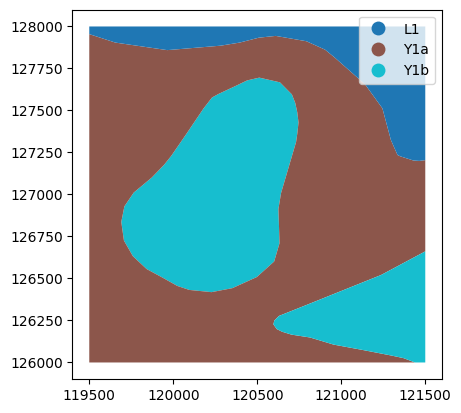

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-warning">
<b>Question 3.0.4: </b><br>Chargez les puits dans un objet nommé gdf_wells et affichez les premières lignes de sa table attributaire.
</div>

In [ ]:
# Résultat attendu ci-dessous...

id                       geometry
0  111   POINT (119623.03 126765.192)
1  753  POINT (119757.968 126675.233)
2   19  POINT (119839.989 126540.296)
3    1  POINT (120197.176 126437.108)
4   79  POINT (120252.739 126437.108)

<div class="alert alert-block alert-warning">
<b>Question 3.0.5: </b><br>Créez une carte où les puits, représentés par un point rouge sont superposés à la carte précédente. Indiquez le numéro du puits à côté du point. Vous pouvez vous aider en complétant le code ci-dessous:
<pre><code>
fig, ax = plt.subplots(figsize=(8,8))
gdf_geol.plot(..., legend=True)
....plot(ax=ax, color='red')
for idx, row in gdf_wells.iterrows():
    ax.text(row...., row...., f'{row.id}')
</code></pre>
</div>

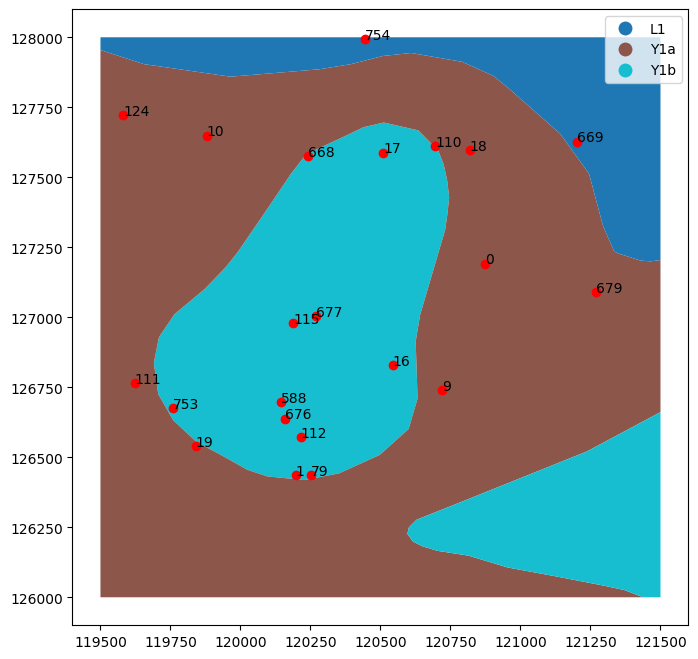

In [ ]:
# Résultat attendu ci-dessous...